<a href="https://colab.research.google.com/github/justinbkeeler/2023-NAA-Student/blob/main/23-0713%20-%20THUR%20-%20Data%20Visualization/Workshop%20%232/2023_NAA_Camp_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

Resource 1: https://www.thepythoncode.com/article/vaderSentiment-tool-to-extract-sentimental-values-in-texts-using-python

Resource 2: https://www.analyticsvidhya.com/blog/2021/01/sentiment-analysis-vader-or-textblob/

**Polarity:** This refers to the extent to which a piece of text is positive, negative, or neutral. In other words, it's a measure of the sentiment orientation. For example, "I love this product!" would have a positive polarity, while "I hate this product!" would have a negative polarity. Many sentiment analysis methods assign polarity values on a scale, typically from -1 (very negative) to 1 (very positive), with 0 representing neutral sentiment.

**Subjectivity:** This refers to the extent to which a piece of text expresses personal opinions, beliefs, judgments, feelings, or evaluations, as opposed to stating factual information. A subjective statement might be something like, "I think this is the best product on the market." An objective statement (subjectivity close to 0), on the other hand, could be something like, "This product weighs two pounds." The subjectivity is usually a measure between 0 (very objective) and 1 (very subjective).

## Lexicon rule-based vs. Machine Learning techniques

  Lexicon and Rule-based Sentiment Analysis: This method uses a predefined list of words (lexicon) each associated with a sentiment score (positive or negative). The text is analyzed word by word and a final sentiment score is computed based on the scores of individual words and some syntactic rules. For example, the word 'good' may have a positive score, but 'not good' would be considered negative due to the rule that handles negations. This method works well when the text closely aligns with the lexicon and rules defined. However, it can fail with complex language structures, sarcasm, or context-specific sentiment.

  Machine Learning-based Sentiment Analysis: This method uses machine learning algorithms to classify text into various sentiments. It involves training a model on a large amount of labeled data (text with associated sentiment) and then using this model to predict the sentiment of new, unseen text. It can handle complex language structures and context-specific sentiment better than rule-based methods, as it can learn these from the training data. The downside is the requirement of large amounts of labeled data, and the complexity involved in training and tuning the model.

## VADER

<font color='red'>NOTE: VADER does not have the ability to provide subjectivity, only polarity. See TextBlob to get subjectivity.</font>


VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool specifically created for social media content, but it works quite well on many types of text. It uses a combination of a sentiment lexicon, grammatical and syntactical rules to predict the sentiment of text. Here's a basic idea of how polarity scores are computed:

 Lexicon Score: VADER has a lexicon (a dictionary of words) where each word has been assigned a sentiment score (positive or negative) from -4 to 4 based on human-annotated data. For example, words like 'love' have positive scores, and 'hate' has a negative score. Neutral words like 'and' or 'the' have a score of 0.

Contextual and Syntactical Adjustment: The basic sentiment score from lexicon is adjusted based on the context. For example, words like "not" before a word can flip the sentiment of that word. Intensity is considered as well (e.g., "good" vs. "extremely good"). It also considers punctuation such as exclamation marks, and emoticons or emojis, which are common in social media.

Aggregation: VADER then aggregates these scores and produces the final scores: positive, negative, neutral, and compound. The 'compound' score is a normalised score of all of the lexicon ratings which have been standardised to range between -1 and 1.

### Option 1: Sentences in an array (aka a "list" data structure)

In [ ]:
# Install vader libary to cloud server
!pip install vaderSentiment

In [ ]:
# Load library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# Initialize the SentimentIntensityAnalyzer by pointing to the sia object
sia = SentimentIntensityAnalyzer()

In [ ]:
sentences = [
    "Clear and constructive feedbacks to students",
    "Approachability",
    "Industry experience, relatability, ability to foster a environment that encourages sharing and discussion",
    "Easy classroom feels - I feel comfortable asking questions and feel listened to. I like how you ask us questions so we can participate",
    "Cares about the subject, interesting",
    "He replies to our messages REALLY fast! This is awesome. He understands our need and makes all he can to accommodate us.",
    "Personable and relatable",
    "care for students",
    "Very responsive outside of class!",
    "Industry knowledge",
    "Communication, flexibility, consideration",
    "Very personable. Lots of anecdotes and examples to help convey lessons taught.",
    "Data knowledge, Presentation and flexibility with students over timing, Availability.",
    "Instructor is engaging. I put off taking this class till my final semester because I heard the prior professor was boring. I was happy to find out that data viz is a lot more fun and useful than I had previously thought.",
    "down to earth, knowledge of topic at hand",
    "Interactive, understanding, great storyteller, and very knowledgeable",
    "Power points are great and exercises were comprehensive",
    "Entertaining and knowledgable",
    "his expertise in the content and helping attitude.",
    "Knowledge of the subject matter"
]

In [ ]:
for sentence in sentences:
    score = sia.polarity_scores(sentence)["compound"]
    print(f'The sentiment value of the sentence :"{sentence}" is : {score}')

The sentiment value of the sentence :"Clear and constructive feedbacks to students" is : 0.3818
The sentiment value of the sentence :"Approachability" is : 0.0
The sentiment value of the sentence :"Industry experience, relatability, ability to foster a environment that encourages sharing and discussion" is : 0.7906
The sentiment value of the sentence :"Easy classroom feels - I feel comfortable asking questions and feel listened to. I like how you ask us questions so we can participate" is : 0.8271
The sentiment value of the sentence :"Cares about the subject, interesting" is : 0.6908
The sentiment value of the sentence :"He replies to our messages REALLY fast! This is awesome. He understands our need and makes all he can to accommodate us." is : 0.6588
The sentiment value of the sentence :"Personable and relatable" is : 0.0
The sentiment value of the sentence :"care for students" is : 0.4939
The sentiment value of the sentence :"Very responsive outside of class!" is : 0.474
The sentime

In [ ]:
for sentence in sentences:
    print(f'For the sentence "{sentence}"')
    polarity = sia.polarity_scores(sentence)
    pos = polarity["pos"]
    neu = polarity["neu"]
    neg = polarity["neg"]
    print(f'The percentage of positive sentiment in :"{sentence}" is : {round(pos*100,2)} %')
    print(f'The percentage of neutral sentiment in :"{sentence}" is : {round(neu*100,2)} %')
    print(f'The percentage of negative sentiment in :"{sentence}" is : {round(neg*100,2)} %')
    print("="*50)

For the sentence "Clear and constructive feedbacks to students"
The percentage of positive sentiment in :"Clear and constructive feedbacks to students" is : 34.2 %
The percentage of neutral sentiment in :"Clear and constructive feedbacks to students" is : 65.8 %
The percentage of negative sentiment in :"Clear and constructive feedbacks to students" is : 0.0 %
For the sentence "Approachability"
The percentage of positive sentiment in :"Approachability" is : 0.0 %
The percentage of neutral sentiment in :"Approachability" is : 100.0 %
The percentage of negative sentiment in :"Approachability" is : 0.0 %
For the sentence "Industry experience, relatability, ability to foster a environment that encourages sharing and discussion"
The percentage of positive sentiment in :"Industry experience, relatability, ability to foster a environment that encourages sharing and discussion" is : 44.4 %
The percentage of neutral sentiment in :"Industry experience, relatability, ability to foster a environmen

### Option 2: Sentences from a .csv data frame (imported)

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/justinbkeeler/2023-NAA-Student/main/23-0713%20-%20THUR%20-%20Data%20Visualization/Workshop%20%232/tcu8w1-q1.csv"

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,Course,respID,Gender,Major,Qual1
0,DV8W1,R_2V4HVjpRNeBqfEp,Female,MAc,Clear and constructive feedbacks to students
1,DV8W1,R_1l4VqSkutvDiMTr,Male,MBA,Approachability
2,DV8W1,R_bBi4hjtj0HppHR7,Male,MBA,"Industry experience, relatability, ability to ..."
3,DV8W1,R_7aGVw7TI2zRmdLr,Female,MAc,Easy classroom feels - I feel comfortable aski...
4,DV8W1,R_3kG5KKRLhKCnkdd,Female,MS-SCM,"Cares about the subject, interesting"


In [ ]:
# subset courses data viz & stat mod course
data_viz = df[df["Course"].isin(["DV8W1"])]
stat_mod = df[df["Course"].isin(["SM8W1"])]

In [ ]:
# Download vader_lexicon
nltk.download('vader_lexicon')

# Instantiate the sentiment analyzer
sid = SentimentIntensityAnalyzer()

df['scores'] = df['Qual1'].apply(lambda Qual1: sid.polarity_scores(Qual1))
df.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Course,respID,Gender,Major,Qual1,scores
0,DV8W1,R_2V4HVjpRNeBqfEp,Female,MAc,Clear and constructive feedbacks to students,"{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'comp..."
1,DV8W1,R_1l4VqSkutvDiMTr,Male,MBA,Approachability,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,DV8W1,R_bBi4hjtj0HppHR7,Male,MBA,"Industry experience, relatability, ability to ...","{'neg': 0.0, 'neu': 0.529, 'pos': 0.471, 'comp..."
3,DV8W1,R_7aGVw7TI2zRmdLr,Female,MAc,Easy classroom feels - I feel comfortable aski...,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp..."
4,DV8W1,R_3kG5KKRLhKCnkdd,Female,MS-SCM,"Cares about the subject, interesting","{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'comp..."


In [ ]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df.loc[df.compound>0, 'sentiment_type']='POSITIVE'
df.loc[df.compound==0, 'sentiment_type']='NEUTRAL'
df.loc[df.compound<0, 'sentiment_type']='NEGATIVE'
print(df)

   Course             respID  Gender    Major  \
0   DV8W1  R_2V4HVjpRNeBqfEp  Female      MAc   
1   DV8W1  R_1l4VqSkutvDiMTr    Male      MBA   
2   DV8W1  R_bBi4hjtj0HppHR7    Male      MBA   
3   DV8W1  R_7aGVw7TI2zRmdLr  Female      MAc   
4   DV8W1  R_3kG5KKRLhKCnkdd  Female   MS-SCM   
5   DV8W1  R_30dA5xSTo0RyzEe  Female      MBA   
6   DV8W1  R_e3ejEBGYMlMnLW1    Male   MBA-SC   
7   DV8W1  R_1pS9fByy5yiU6YX  Female   MBA-SC   
8   DV8W1  R_ehBJmR4WVVttmNP  Female      MAc   
9   DV8W1  R_UgTA26Jmkab5gRj    Male   MS-SCM   
10  DV8W1  R_25sBa47PDWQQqzs  Female      MBA   
11  DV8W1  R_3neIDncADfqN526    Male      MAc   
12  DV8W1  R_2WBiYH66CsFC3Wd  Female   MS-SCM   
13  DV8W1  R_1QmjmFUp0085YSS    Male   MBA-BM   
14  DV8W1  R_2BaMfDzqLI5BVwL    Male      MBA   
15  DV8W1  R_2X04reT4AS0uFoB  Female  MBA-Fin   
16  DV8W1  R_sBWvavJR7dfk8CJ  Female      MBA   
17  DV8W1  R_3oBJcw0IkJqImyE    Male      MAc   
18  DV8W1  R_1Edrob3NIHjdHy8    Male   MBA-SC   
19  DV8W1  R_2eQEd0V

INTERPRETATION:

Because VADER is a lexicon and rule-based sentiment analysis tool, it is specifically attuned to sentiments expressed in social media. It gives a score to the sentiment of the text data, which includes four elements: 'neg', 'neu', 'pos', and 'compound'. Here is what they mean:

'neg': This is the negative sentiment in a sentence.
'neu': This is the neutral sentiment in a sentence.
'pos': This is the positive sentiment in a sentence.
'compound': The compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1 (most extreme negative) and +1 (most extreme positive).

The compound score gives an overall sentiment of the sentence, considering the mixture of the sentiments. It is computed using a mathematical formula which takes into account the above three scores.

In your provided code, the 'scores' column in the DataFrame (df) is presumably a dictionary that was created from sentiment analysis. The lambda function in the first line is used to create a new 'compound' column by extracting the 'compound' value from each dictionary in the 'scores' column.

Then, the code is creating a new column named 'sentiment_type' which is initially empty. The next three lines are categorizing sentiment based on the 'compound' score:

If the 'compound' score is greater than 0, the sentiment is categorized as 'POSITIVE'.

If the 'compound' score is equal to 0, the sentiment is categorized as 'NEUTRAL'.

If the 'compound' score is less than 0, the sentiment is categorized as 'NEGATIVE'.

<Axes: title={'center': 'Sentiment Analysis'}>

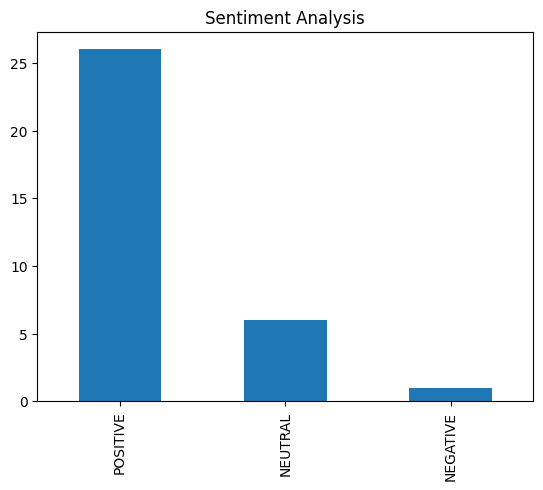

In [ ]:
df.sentiment_type.value_counts().plot(kind='bar', title="Sentiment Analysis")

## TextBlob

For sentiment analysis, TextBlob uses a pre-trained machine learning model to classify text as either positive, negative, or neutral. Here's how TextBlob's sentiment analysis works:

Polarity: This is a floating-point number that lies in the range [-1,1], where 1 means positive sentiment and -1 means a negative sentiment. TextBlob calculates the polarity by taking the average sentiment of all words in the text that are found in its sentiment lexicon. Each word in the lexicon has been human-annotated with a sentiment polarity.

Subjectivity: This is also a floating-point number that lies in the range [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. TextBlob follows the same approach for calculating subjectivity: it takes the average subjectivity of the sentiment-laden words in the text.

In [ ]:
# Load library
from textblob import TextBlob

In [ ]:
text1 = TextBlob ("The most surprising part of this course was the detailed data munging (data cleaning) that had to be done to get the data ready for use in R. "
"Great emphasis was placed on not removing data unless there was ample reason to consider it tainted (i., not merely because an attention check was missed or the data point was an outlier). "
"Additionally, extreme care and impartiality were used when translating open-response (qualitative) data into numerical values R could interpret. "
"Finally, the opportunity to apply exploratory data analysis to real-world data was such a great learning experience. "
"Testing variables for normality and comparing data sets with and without observations that missed the attention or effort checks gave me increased familiarity with R coding and graphical interpretation, besides providing valuable insights about the effects of certain flagged observations. "
"Our team also examined outliers, demographics, and correlations. "
"Without a doubt, this course has been a valuable and memorable learning experience. ")

In [ ]:
text1.sentiment

Sentiment(polarity=0.35327380952380955, subjectivity=0.6934523809523809)

In [ ]:
text2 = TextBlob ("Over the summer, I was able to get hands-on experience in research and data analytics while studying the integration of Slack into higher education. "
"I was able to apply my introductory knowledge of R to help clean data sets, organize groups of variables, and prepare plots and graphs. "
"The biggest thing that I learned throughout the course of this summer was the importance of having sound data in the beginning. "
"Research will eventually fall through and not hold up to statistical testing if it isn’t collected properly. "
"I also learned that even though it is extremely time-consuming, cleaning the data properly is an essential step in the research process. "
"Without clean, organized data, you can’t even begin to perform tests or code graphs. "
"In addition to learning how to properly clean data, I also learned how crucial graphs and plots can be. "
"A graph is able to take hundreds of seemingly meaningless data points and put them together and tell a story or demonstrate a relationship. "
"R is an amazing coding language for graphing because of the ggplot2 software in the tidyverse package. "
"I was able to see firsthand how to create complex QQ plots that integrate different variables, and these graphs helped piece the data together. "
"Ultimately, this summer showed me that the process of research starts with data, deals with lots of data and ends with trying to demonstrate how that data is correlated. ")

In [ ]:
text2.sentiment

Sentiment(polarity=0.1902777777777778, subjectivity=0.6555555555555556)